**линейная регрессия, аналитическое решение**

Евгений Борисов  <esborisov@sevsu.ru>

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=2)

## генерируем данные

In [3]:
n_samples=500
X = np.linspace(-1,1,n_samples).reshape(-1,1)
target = np.sin((X)*2.9)+np.random.rand(n_samples).reshape(-1,1)

y = target # [:,np.newaxis]

X.shape,y.shape

((500, 1), (500, 1))

In [4]:
# нормируем данные
# from sklearn.preprocessing import MinMaxScaler
# X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

# from sklearn.preprocessing   import StandardScaler
# X = StandardScaler().fit(X).transform(X)

In [5]:
# np.percentile(X,[10,25,50,75,95],axis=0) 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((250, 1), (250, 1), (250, 1), (250, 1))

In [7]:
del X
del y
del target

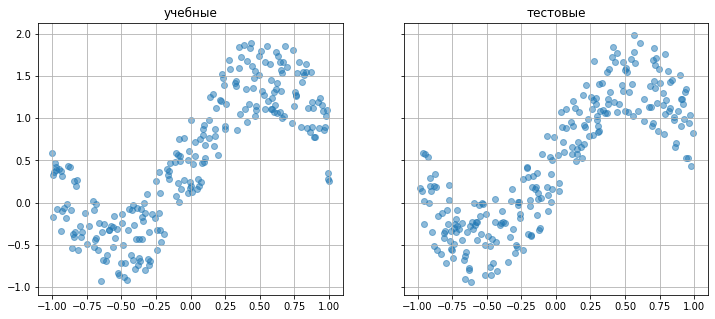

In [8]:
def plot_data(ax,X,y,t):
    ax.set_title(t)
    ax.scatter( x=X, y=y,alpha=0.5 )
    ax.grid()

fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_train,y_train,'учебные')    
plot_data(ax1,X_test,y_test,'тестовые')    
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_degree = 3 # степень полинома

# собираем полином, добавляем столбец из единиц (свободный член)
poly = PolynomialFeatures(poly_degree).fit(X_train)
Xp = poly.transform(X_train)
Xp.shape

(250, 4)

## модель

$$a(x,w) = \sum\limits_{i=1} x_i \cdot w_i + w_0$$

In [10]:
def model(x,w): # модель логрегересии
    return x.dot(w)[:,np.newaxis]

## обучаем модель

In [11]:
def msqe(y,o): # средняя квадратичная ошибка
    d = o-y 
    return d.T.dot(d).flatten()[0]/len(y)

$$ w = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

In [12]:
# вычисляем параметры регрессии
w = np.linalg.inv(Xp.T.dot(Xp) ).dot(Xp.T).dot(y_train).flatten()
w

array([ 0.49,  2.55,  0.04, -2.45])

## тестируем модель

In [13]:
x_train = np.linspace(X_train.min(axis=0)[0],X_train.max(axis=0)[0],len(y_train))[:,np.newaxis]
s_train = model(poly.transform(x_train),w)
msqe_train = msqe(y_train,s_train)

x_test = np.linspace(X_test.min(axis=0)[0],X_test.max(axis=0)[0],len(y_test))[:,np.newaxis]
s_test = model(poly.transform(x_test),w)
msqe_test = msqe(y_test,s_test)

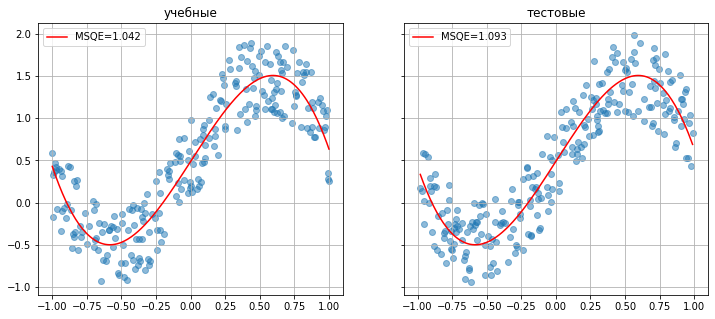

In [14]:
fig, (ax0,ax1) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(12,5),)
plot_data(ax0,X_train,y_train,'учебные')  
ax0.plot(x_train,s_train,c='r',label='MSQE=%.3f'%(msqe_train))
ax0.legend()

plot_data(ax1,X_test,y_test,'тестовые')    
ax1.plot(x_test,s_test,c='r',label='MSQE=%.3f'%(msqe_test))
ax1.legend()

plt.show()